## Stack Overflow Python Analysis

#### Executive Summary

Stack Overflow is an open source coding exchange website founded in 2008, where users can inquire and provide feedback about coding projects using a variety of coding languages. The website facilitates the self-teaching of programming languages and provides crowdsourced information for those seeking coding help. Since its foundation, hundreds of thousands of questions and answers have been submitted and logged into the Stack Overflow database. After nearly a decade of recorded data, we want to find out if we can analyze this data in order to discover existing trends.
           
Because Stack Overflow is used for students and other individuals wanting to learn programming, analyzing the trends of the website can give us valuable insight on the process of  how individuals learn a programming language. This information, in turn can be used to improve the teaching methods of instructors, as they will have a better understanding of students by knowing the patterns that emerge within individuals learning a programming language.



#### Ideal Findings

For our analysis, we will be analyzing a dataset of python-specific questions from the Stack Overflow database. From this question bank, we hope to discover common topics and taglines that are included within the asked questions. This information would reveal the most frequently asked questions on the website and give us an idea of which topics are of most interest to individuals learning python. In addition, we plan to perform a time-series analysis on the peak times during the day and week that users post python related questions. Furthermore, we want to gauge the average time it takes between a question being asked and answered, in order to measure the effectiveness of the website. Lastly, we want to perform a predictive analysis of a “good question” given the factors that can constitute it, and build a model using this algorith that can predict a good or bad question. All of this collected information can assist in the development of python curriculum. By knowing the most sought after topics and the peak times that students program, instructors can develop their curriculum in a way that addresses the inquiries that students have, thus improving the teaching process. 

#### Background Summary 

Previously, a similar analysis was conducted using this particular dataset. The experimenter wanted to analyze the treatment of Stack Overflow as a social network, and created a wordmap using popular tags provided by Stack Overflow and modeled an image that portrayed the words in varying sizes based on popularity. Our goal is to further expand this analysis and create a list of the most questioned terms, and create a frequency illustration of these terms. The prior analysis also incorporated machine learning elements in the analysis as well, which created an algorithm of what makes a “good" question. We want to perform a similar model and create a predictive algorithm of our own ideally with higher accuracy. The peak time analysis and the question/answer speed analysis have not been completed to our knowledge during the time of this project, and we hope to build upon the research behind this dataset with these additions.



###### *Computational setup and Results are listed within each section of the report. Steps are provided internally and results are discribed after they are printed

#### Import files

In [1]:
import pandas as pd                    #import libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

*To run this operation, the files Questions.csv, Answers.csv, and Tags.csv must be present within the working folder.
Download Link: https://www.kaggle.com/stackoverflow/pythonquestions

In [2]:
Q = pd.read_csv('Questions.csv')  #read the Questions file
tags = pd.read_csv('Tags.csv')            #read the Tags file

#### Frequency Distribution of Questions

Firstly, we want to find the frequency of the python related questions asked on Stack Overflow, and see if any trends exist within the days and weeks. Knowing this information can be helpful in knowing the peak times that users post questions, which would correlate directly into when users perform the most programming. It can be assumed that the more questions that are answered during a given time, the more people are working on coding projects during that same given time.  

In [3]:
Q["Creation_Date"] = Q["CreationDate"].str[:10] 
#extract the first ten of the strings and store them as Q["Creation_Date"]
Q["Creation_Time"] = Q["CreationDate"].str[11:19] 
#extract the 12th to 19th of the strings and store them as Q["Creation_Time"]

In [4]:
import datetime as dt  
#assign a question date and time parameter
Q['Start Day']=pd.DatetimeIndex(Q['Creation_Date']).date  
Q['Start Time']=pd.DatetimeIndex(Q['Creation_Time']).time  
Q['Start Weekday']=pd.DatetimeIndex(Q['Creation_Date']).weekday 
Q['Hours']=pd.DatetimeIndex(Q['Creation_Time']).hour
Q['Day_Of_Week']=pd.DatetimeIndex(Q['Creation_Date']).weekday_name

Q.head(3)

,Id,OwnerUserId,CreationDate,Score,Title,Body,Creation_Date,Creation_Time,Start Day,Start Time,Start Weekday,Hours,Day_Of_Week
0,469,147.0,2008-08-02T15:11:16Z,21,How can I find the full path to a font from it...,<p>I am using the Photoshop's javascript API t...,2008-08-02,15:11:16,2008-08-02,15:11:16,5,15,Saturday
1,502,147.0,2008-08-02T17:01:58Z,27,Get a preview JPEG of a PDF on Windows?,<p>I have a cross-platform (Python) applicatio...,2008-08-02,17:01:58,2008-08-02,17:01:58,5,17,Saturday
2,535,154.0,2008-08-02T18:43:54Z,40,Continuous Integration System for a Python Cod...,<p>I'm starting work on a hobby project with a...,2008-08-02,18:43:54,2008-08-02,18:43:54,5,18,Saturday


In [5]:
Number_Of_Questions_Hours = Q.groupby(["Start Weekday", "Hours", "Day_Of_Week"], as_index=False).Id.count()  
#group the data, add index to it and count the number of Ids 
Number_Of_Questions_Hours.head(3)

,Start Weekday,Hours,Day_Of_Week,Id
0,0,0,Monday,2418
1,0,1,Monday,2433
2,0,2,Monday,2459


In [6]:
Number_Of_Questions_Weekday = Q.groupby(["Start Weekday", "Day_Of_Week"], as_index=False).Id.count()  
#group the data by day, add index and count the number of question Ids 

Number_Of_Questions_Weekday["Day"] = "Weekday"
#assign weekday designation to each day
for i in range(5,7):
    Number_Of_Questions_Weekday["Day"][i] = "Weekend" 
#separate weekend dates from remaining weekdays

from bokeh.io import output_notebook, output_file  
#from bokeh import specific functions
from bokeh.io import show
from bokeh.plotting import figure
from bokeh.models import Range1d, HoverTool
from bokeh.charts import Bar, Line
from bokeh.charts.attributes import ColorAttr, CatAttr
from bokeh.charts.builders.bar_builder import BarBuilder
from bokeh.palettes import brewer

output_notebook()  
#tell bokeh to output within this notebook

palette = brewer["Blues"][3]  
#change color palette to blue


p = Bar(Number_Of_Questions_Weekday ,values="Id",label=CatAttr(columns=['Day_Of_Week'], sort=False),  #plot the barchart
        xlabel= "Day of the Week", ylabel="Number of Questions asked", 
        color = "Day",legend=False,palette=palette)
show(p)  #create a bar plot for each day of the week

C:\Users\Doug\Anaconda2\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


Loading BokehJS ...

In [7]:
Number_Of_Questions_Weekday  
#count for each day of the week

,Start Weekday,Day_Of_Week,Id,Day
0,0,Monday,93006,Weekday
1,1,Tuesday,101204,Weekday
2,2,Wednesday,103563,Weekday
3,3,Thursday,101222,Weekday
4,4,Friday,91197,Weekday
5,5,Saturday,57183,Weekend
6,6,Sunday,59907,Weekend


In [8]:
p = Line(Number_Of_Questions_Hours ,y="Id", x = "Hours", 
        xlabel= "Hours", ylabel="Number of Questions asked", 
        color = "Day_Of_Week",legend=True, palette=["red", "green", "blue","yellow", "magenta", "black","brown","pink"])
show(p) 
#create a line graph of number of questions vs. hour of day

By sorting the data by the specific date and time the questions were asked, we were able to create a visualization of the total number of questions asked on each day. The results of the first chart indicate that questions are asked on weekdays far more than weekends, with Wednesday being the peak day for questions. Tuesday and Thursday seemed to correspond with less questions than Wednesday, and Monday and Friday had similar results we further less, creating a bell curve distribution during the weekdays.

The second chart depicts the hourly frequency distribution within each day. The total results are consistent with the first graph. Each weekday has a consistent peak time around 2-4 pm, while weekends have a peak time around 5-7 pm. This illustrates the most popular times that individuals code and ask for assistance with their projects.
 

#### Finding the time it takes for user submitted questions to be answered

One gauge of the effectiveness of Stack Overflow is the speed in which questions are answered. If help is not provided in a timely manner, then the crowdsourced information is not meeting its purpose, and users will not derive value from the website. Using the question posting dates and time with the corresponding answer date and time, we hope to find a distribution of times and find the most likely range of time that will be needed for a question to be answered.

In [9]:
A = pd.read_csv("Answers.csv")  #read the answers file
A["Creation_Date"] = A["CreationDate"].str[:10]  
#extract the first ten of the strings and store them as A["Creation_Date"]
A["Creation_Time"] = A["CreationDate"].str[11:19] 
#extract the 12th to 19th of the strings and store them as Q["Creation_Date"]
A.head(3)

,Id,OwnerUserId,CreationDate,ParentId,Score,Body,Creation_Date,Creation_Time
0,497,50.0,2008-08-02T16:56:53Z,469,4,<p>open up a terminal (Applications-&gt;Utilit...,2008-08-02,16:56:53
1,518,153.0,2008-08-02T17:42:28Z,469,2,<p>I haven't been able to find anything that d...,2008-08-02,17:42:28
2,536,161.0,2008-08-02T18:49:07Z,502,9,<p>You can use ImageMagick's convert utility f...,2008-08-02,18:49:07


In [10]:
import datetime as dt
#assign an answer date and time parameter
A['Start Day']=pd.DatetimeIndex(A['Creation_Date']).date  
A['Start Time']=pd.DatetimeIndex(A['Creation_Time']).time  
A['Start Weekday']=pd.DatetimeIndex(A['Creation_Date']).weekday
A['Hours']=pd.DatetimeIndex(A['Creation_Time']).hour
A['Day_Of_Week']=pd.DatetimeIndex(A['Creation_Date']).weekday_name
A.head(3)                               

,Id,OwnerUserId,CreationDate,ParentId,Score,Body,Creation_Date,Creation_Time,Start Day,Start Time,Start Weekday,Hours,Day_Of_Week
0,497,50.0,2008-08-02T16:56:53Z,469,4,<p>open up a terminal (Applications-&gt;Utilit...,2008-08-02,16:56:53,2008-08-02,16:56:53,5,16,Saturday
1,518,153.0,2008-08-02T17:42:28Z,469,2,<p>I haven't been able to find anything that d...,2008-08-02,17:42:28,2008-08-02,17:42:28,5,17,Saturday
2,536,161.0,2008-08-02T18:49:07Z,502,9,<p>You can use ImageMagick's convert utility f...,2008-08-02,18:49:07,2008-08-02,18:49:07,5,18,Saturday


In [11]:
Avg_Time_Q = Q[["Id", "Creation_Date", "Creation_Time"]] 
#extract the three columns in Question file
Avg_Time_Q['Date_Time'] = Avg_Time_Q['Creation_Date']+' '+Avg_Time_Q['Creation_Time'] 
#combine the two columns and store them as Avg_Time_Q['Date_Time'] 
Avg_Time_Q = Avg_Time_Q.drop(["Creation_Date", "Creation_Time"], axis = 1)  
#drop the two columns named "Creation_Date" and "Creation_Time"
Avg_Time_Q.head()

C:\Users\Doug\Anaconda2\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Id,Date_Time
0,469,2008-08-02 15:11:16
1,502,2008-08-02 17:01:58
2,535,2008-08-02 18:43:54
3,594,2008-08-03 01:15:08
4,683,2008-08-03 13:19:16


In [12]:
Avg_Time_A = A[["ParentId", "Creation_Date", "Creation_Time"]] 
#extract the three columns in Answer file
Avg_Time_A['Date_Time'] = Avg_Time_A['Creation_Date']+' '+Avg_Time_A['Creation_Time'] 
#combine the Creation Date and Creation Time columns 
Avg_Time_A = Avg_Time_A.drop(["Creation_Date", "Creation_Time"], axis = 1) 
#drop the two columns
Avg_Time_A.rename(columns={"ParentId":"Id"},inplace = True)  
#Replace values given in ‘ParentId’ with ‘Id’

C:\Users\Doug\Anaconda2\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [13]:
Avg_Time = pd. merge(Avg_Time_Q, Avg_Time_A, on=["Id"], how="inner")  
#join the two dataframes by Id using intersection of keys from both frames, namely 'Id'
Avg_Time = Avg_Time.drop_duplicates(subset=['Id'], keep="first") 
#drop the duplicates in Column 'Id' except for the first occurrence

Avg_Time['Time_x'] =  pd.to_datetime(Avg_Time['Date_Time_x'], format='%Y-%m-%d %H:%M:%S') 
#parse data in column 'Date_Time_x' to datetime objects; easier format to read
Avg_Time['Time_y'] =  pd.to_datetime(Avg_Time['Date_Time_y'], format='%Y-%m-%d %H:%M:%S')
Avg_Time.head()

,Id,Date_Time_x,Date_Time_y,Time_x,Time_y
0,469,2008-08-02 15:11:16,2008-08-02 16:56:53,2008-08-02 15:11:16,2008-08-02 16:56:53
4,502,2008-08-02 17:01:58,2008-08-02 18:49:07,2008-08-02 17:01:58,2008-08-02 18:49:07
7,535,2008-08-02 18:43:54,2008-08-02 18:56:56,2008-08-02 18:43:54,2008-08-02 18:56:56
14,594,2008-08-03 01:15:08,2008-08-03 01:17:36,2008-08-03 01:15:08,2008-08-03 01:17:36
17,683,2008-08-03 13:19:16,2008-08-03 14:30:50,2008-08-03 13:19:16,2008-08-03 14:30:50


In [14]:
Avg_Time["Difference"] = (Avg_Time["Time_y"]-Avg_Time["Time_x"])  
#calculate the difference between ask time and answertime and average the results
Avg_Time = Avg_Time.reset_index() 

In [15]:
(Avg_Time['Difference']).mean()
#print mean 

Timedelta('8 days 15:48:52.917350')

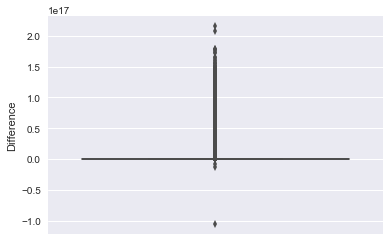

In [16]:
sns.boxplot(data=Avg_Time, y = "Difference")
#plot boxplot of time distribution 

When we ran the boxplots for the entire timelime, we found that many outliers existed within the data. For example, if a question was never answered or took many days to answer, then the time taken to answer will be high or non-existance. This makes the average time to extremely high. In this case, the average time is around 8 days. In order to offset this, the data was must be subsetted in order to eliminate outliers. 

In [17]:
Avg_Time1day = Avg_Time[Avg_Time['Difference']<'1 day 00:00:00']
Avg_Time1day = Avg_Time1day[Avg_Time1day['Difference']>'00:00:00'] 
#limit the average time to 1 day

In [18]:
(Avg_Time1day['Difference']).mean()
#print mean

Timedelta('0 days 01:39:35.090669')

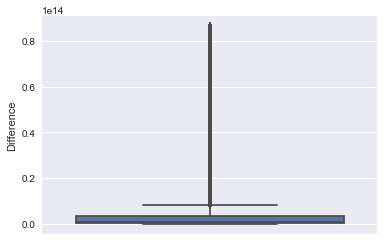

In [19]:
sns.boxplot(data=Avg_Time1day, y = "Difference")
#plot boxplot of time distribution 

Subsetting the data into one day eliminate the outliers to narrow the data within a day. Running this analysis shows an average answer time of 1 hour and 39 minutes, which is a relatively fast time to address an issue. However, many outliers still exist, so it would be a good idea to subset further. 

In [20]:
Avg_Time1hr = Avg_Time[Avg_Time['Difference']<'01:00:00']
Avg_Time1hr = Avg_Time1hr[Avg_Time1hr['Difference']>'00:00:00']
#limit the average to 1 hour

In [21]:
(Avg_Time1hr['Difference']).mean()
#print mean

Timedelta('0 days 00:14:37.080346')

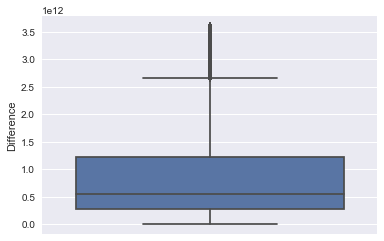

In [22]:
sns.boxplot(data=Avg_Time1hr, y = "Difference")
#plot boxplot of time distribution 

Subsetting the data further to 1 hour shows a more narrowed dataset and a clearer visual on the average time range. The y axis corresponds to the percentage of a day, with about 4% of a day being an hour. Given a one hour range, the box plot depicts a range of around 5-18 minutes. That being said, this is the expected time that it would take for a question to be answered

According to the data, the average number of days for a question to be answered is 8.5 days. This number seems large, but the data is skewed, by outliers, as shown in the box and whisker plot. The median number is a better measure of performance, which is within the day range.

#### Most Common Topics Asked by Users

Knowing when and how quickly questions are posted and addressed is important, but what about the content of these questions? Using text mining, we wish to discover common taglines that correspond to topics related to python. The more a tag shows up within a title of a question, the more it is used and asked about by programmers. This popularity index will reveal the topics that are inquired about most, and help us discover the topics that students of python are interested in learning more about.

In [23]:
Q.head()  
merged = Q.merge(tags,on='Id',how='left')  
#merge questions and tags datasets
merged_score = merged[['Score','Tag']].copy()  
#access the two columns of the dataframe and return a copy of it

In [24]:
tags_df = tags.groupby('Tag',as_index = False).count() 
#return the number of Ids under each tag
tags_df = tags_df.sort_values(['Id'], ascending=False)  
#sort the data in descending value of the number of Ids under each tag
tags_df = tags_df.reset_index(drop = True)  
#reset the index to the default integer index
tags_top = tags_df[:20]    
tags_top.head(n=20)  #list top 20 tags

,Tag,Id
0,python,607283
1,django,62818
2,python-2.7,34616
3,pandas,26854
4,python-3.x,26814
5,numpy,25848
6,list,18951
7,matplotlib,16521
8,regex,14047
9,dictionary,13413


Using the merged datasets, we text mined the questions in order to find the tags that appeared the most throughout the dataset, and their corresponding frequency of input, which are listed above. We also found the tags that belonged to the questions with the highest scores, but this information was irrelevant due to the randomness of the score distribution. However, question score became a variable in performing our predictive analysis of a good or bad question further in the report.
The tags that are most popular are the ones that are typically taught earlier on in pyton cirriculum. More users are asking these questions because these are fundamental python functions. The more advanced functions are less frequent, but still important aspects of python as they have generated thousands of questions as well.

#### Plotting the Trends of Seven Top Topics

In furtherance of finding the most questioned taglines, we wish to illustrate the changes that seven of these topics underwent over the several years of Stack Overflow's existence. This information will provide insight on when and to what degree each topic became popular. The dates of the posted questions will be used to determine this trend.

In [25]:
tagsNeeded = ['pandas','numpy','list','matplotlib','dictionary','string','arrays']
# dataset for specific 7 common topics

filData = merged[['Id','Score','CreationDate','Tag']]  
# get a shallow copy of the four columns
filData['CreationDate'] = pd.to_datetime(filData['CreationDate']) 
# parse CreationDate into a datetime object
filData = filData[filData['Tag'].isin(tagsNeeded)]
# select only rows what tag is in the tagsNeeded list
filData = filData.sort_values(['Tag'], ascending = True) 
# sort the data by the Tag column in ascending order
filData['Year'] = pd.DatetimeIndex(filData['CreationDate']).year 
# create a Year column, containing only the year of the CreationDate
filData['Month'] = pd.DatetimeIndex(filData['CreationDate']).month 
# create a Month column, containing only the year of the CreationDate
filData['Date'] = pd.DatetimeIndex(filData['CreationDate']).date 
# create a Date column, containing only the year of the CreationDate

filData.head(5)

C:\Users\Doug\Anaconda2\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,Id,Score,CreationDate,Tag,Year,Month,Date
17,683,28,2008-08-03 13:19:16,arrays,2008,8,2008-08-03
265376,9296658,9,2012-02-15 15:55:58,arrays,2012,2,2012-02-15
265382,9296893,2,2012-02-15 16:10:18,arrays,2012,2,2012-02-15
1806831,39156458,-2,2016-08-25 23:58:27,arrays,2016,8,2016-08-25
830158,23345715,2,2014-04-28 15:56:13,arrays,2014,4,2014-04-28


In [26]:
import datetime as dt
#assign a date and time to the data in order to plot the time series
filDataGroup = filData.groupby(['Tag',"Year"],as_index = False).Id.count() 
# group rows with the same Tag and Year together, then count them
filDataExp = filData.groupby(['Tag','Date'],as_index = False).count() 
# group rows with the same Tag and Date together, then count them
filDataExp = filDataExp.drop(['Score','CreationDate'],axis=1,inplace=True) 
#drop the two columns named 'Score' and 'CreationDate'
filDataGroup.head()                                                                              

,Tag,Year,Id
0,arrays,2008,11
1,arrays,2009,66
2,arrays,2010,173
3,arrays,2011,335
4,arrays,2012,526


In [27]:
np.unique(filDataGroup['Tag'])  
# display unique tags in the dataframe

array(['arrays', 'dictionary', 'list', 'matplotlib', 'numpy', 'pandas',
       'string'], dtype=object)

In [28]:
# from bokeh import specific functions
from bokeh.charts import BoxPlot 
from bokeh.io import output_notebook
from bokeh.io import show
from bokeh.plotting import figure
from bokeh.models import Range1d, HoverTool
from bokeh.charts import Bar, Line, Scatter
from bokeh.palettes import brewer
from bokeh.charts import TimeSeries
output_notebook()  
# tell bokeh to output within this notebook

# for each tag, plot the Number of Questions over the years
p = Line(filDataGroup, x='Year', y = "Id", color = "Tag", xlabel = "Years", ylabel="Number of Questions",
# give each tag's plot a different color        
         palette=["red", "green", "blue","yellow", "magenta", "black","brown"])

show(p) #plot time series with each of the seven tags

Loading BokehJS ...

The above image shows the number of questions asked about a particular topic over the eight years of data. In general, each of the topic's frequency is increasing, possibly largely due to the increase in popularity regarding Stack Overflow and python as a whole. One notable trend is the pandas line, which originated around the end of 2010, but has gained a massive amount of popularity in its shorter lifespan due to its usefulness, resulting in a frequency spike higher than the other taglines.

#### Predictive Model of Good and Bad Questions

With so many questions regarding python stored within the database, trends will undoubted begin to develop that result in certain questions being more successful than others. Questions that get a large amount of upvotes and contain popular tags seem to be more successful, but we want to discover to what degree they are. Having known what makes a question "good" or "bad", can we create a predictive model that can look at a question and determine whether it is good? If so, our aim is to make this prediction as accurate as possible in order to have an accurately classify each of the remaining questions within the question database.

In [29]:
questions = pd.read_csv('Questions.csv', usecols = ['Id','CreationDate','Score'])
# Extract Id, CreationDate, and Score columns from questions dataset
tags = pd.read_csv('Tags.csv') 
# Get the Tags dataset

In [30]:
#tags chosen for this analysis, based on the top list, with self-explanitory tags such as "python" removed'
tagsNeeded = ['pandas','numpy','list','matplotlib','dictionary',
              'string','arrays','scipy','class','dataframe',
              'function','scikit-learn','pip','datetime','multithreading']

# Merge the two datasets
df = questions.merge(tags,on='Id',how='left')

# Define "Good" and "Bad"
df['Good/Bad'] = np.where((df['Tag'].isin(tagsNeeded)) & (df['Score']>0), 1, 0)

In [31]:
df['Good/Bad'].value_counts() 
# Count the number of good and bad questions in dataset

0    1788119
1      96955
Name: Good/Bad, dtype: int64

This is the number of questions within the dataset that are considered "good"(1) or "bad"(0). A "bad" questions does not neccessarily mean that the question has no value or is not good, but does not meet the threshold that makes it an exemplary questions, which is about 7% of the total questions. 

In [32]:
tags_df = tags.groupby('Tag',as_index = False).count() 
# Group by Tag to find popular questions
tags_df = tags_df.sort_values(['Id'], ascending=False)
# Sort the values to identify the top ones.
tags_df = tags_df.reset_index(drop = True) 
# Reset the index
tags_top = tags_df[:5] 
# Identify the top 5 tags


filData = df[['Id','CreationDate','Tag','Good/Bad','Score']]
# Extract data we need.
filData = filData[filData['Tag'].isin(tags_top['Tag'])] 
# This is optional; Only needed if we are using the above block of code.

In [33]:
df_filt = pd.get_dummies(filData['Tag']) 
# Get the dummie variables
dfFinal = pd.concat([df,df_filt],axis=1) 
# Now that you have the dummies, combine the dataframes
dfFinal.fillna(0, inplace=True) 
# Fill the NaN to 0s.

In [34]:
dfFinal['Score1']=dfFinal['Score'] 
# Move the columns around

In [35]:
from sklearn.cross_validation import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

train, test = train_test_split(dfFinal, test_size = 0.2)
#Define Training and Testing

features = list(train.columns[5:])
# Feature List

Y = train["Good/Bad"] 
X = train[features] 
#Define X and Y

Y_Test = test["Good/Bad"] 
X_Test = test[features]
#Define X,Y on Test

dt = DecisionTreeClassifier() 
# Create a model to be used
dt_fit = dt.fit(X, Y) #Fit the model to the data

Y_pred = dt_fit.predict(X_Test) 
# Now, test the model by attempting to predict
# Y_pred #-If you want to see the prediction(s), uncomment this

print "Accuracy is ", accuracy_score(Y_Test,Y_pred)*100
# print the Accuracy

confusion_matrix(Y_Test, Y_pred, labels = [0,1]) 
# print the confusion Matrix

C:\Users\Doug\Anaconda2\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


Accuracy is  95.8187340026


array([[357858,     14],
       [ 15750,   3393]])

In [36]:
#Custom Prediction Maker
df2 = pd.DataFrame(data = None, columns=df_filt.columns)

def zerolistmaker(n):
    listofzeros = [0] * n
    return listofzeros
# create list of zero values

def main():
    s = input("Please enter the score:")
# create manual input for score
    tag = str(input("Please enter the tag:"))
# create manual input for score
    truth = tag in list(df2)
    myList = zerolistmaker(len(list(df2))+1)
    myList[len(list(df2))] = s
    if truth:
        i = list(df2).index(tag)
        myList[i]=1
#zero becomes 1 or good question if true
    if dt_fit.predict(myList) == 1:
        print 'Good Question'
    else:
        print 'Not a Good Question'
# prints result of output. If equal to one question is good
    
main()  
###When entering data, write tags in quotation marks. For example -'numpy' ###

Please enter the score:55
Please enter the tag:'pandas'
Good Question


C:\Users\Doug\Anaconda2\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


We ended up using the decision tree with 5 dummy variables for the 5 top topics since it gave us a relatively high accuracy rate without too much complexity. The above function takes a topic sees if it is one of top 5 topics, then uses the score as the second parameter. It creates a row with the score and the appropriate dummy variable and runs the specific row through the model to predict whether it is a good question or not.

With this model, we are able to specify the score of the question as well as the tag and determine whether the question is good, at around 95% accuracy Given these tags and the question score, the algorithm can analyze each the questions and decide the goodness, as denoted by a 1 for good or a 0 for not good.

#### Conclusion and Recommendation

Summarizing the results of the various analyses, we can draw recommendations towards the teaching of python and use these insights to improve the curriculum and teaching methods of python instructors. By knowing the key topics that students and users ask about, instructors can make sure that they cover these topics in detail. The top 20 list should be reviewed by each instructor, and they should adjust their curriculum to reflect these important topics. By learning more about these topics in class and during projects, students will develop a firmer understanding from the class and feel less of a need to look towards outside sources for assistance.

Knowing the peak times that students program is helpful as well. Because the peak times during weekdays are consistent, professors can make themselves or teaching assistants available during this time to answer student concerns. For example, a professor could schedule office hours for TAs from 2-4pm each day to accommodate for the time that most people find it convenient to code. This will assist in the learning process and ensure that students always have resources available during peak times.

Furthermore, knowing on average how fast question are answered within Stack Overflow can be helpful in encouraging instructors to use it as a resource. Since instructors have limited time and resources, and are not always available to address student concerns, recommending the wealth of crowdsourced information that Stack Overflow provides or including links to particular questions that are answered could provide students with additional tools to enhance learning.

Finally, by knowing which questions are considered “good” and “bad” questions, instructors can use Stack Overflow to find “good” questions to present to classes and provide additional resources for students. In addition, instructors can be encouraged to answer “good” questions on Stack Overflow, thus providing their knowledge beyond the classroom to a broader range of users. 

By using the data presented on one of the largest coding sites, we are able to ease the burden of learning and make the python learning process more natural for students. As more students develop a further understanding of the concepts, then they in turn can transfer this knowledge into beginners who wish to learn programming themselves, thus spreading the scope of python and programming in general even further.
